## Gathering the data

In [58]:
import pandas as pd
import os

data_path = "Fantasy-Premier-League/data/2023-24"

current_data_path = "Fantasy-Premier-League/data/2024-25"

def load_player_metadata(data_path):
    players_raw_path = os.path.join(data_path, 'players_raw.csv')
    players_df = pd.read_csv(players_raw_path)
    return players_df

def load_gameweek_data(data_path):
    gws_path = os.path.join(data_path, 'gws')
    all_gw_files = [os.path.join(gws_path, f) for f in os.listdir(gws_path) if f.startswith("gw")]

    gameweeks = []
    for gw_file in all_gw_files:
        gw_df = pd.read_csv(gw_file)
        gameweeks.append(gw_df)

    all_gameweek_data = pd.concat(gameweeks, ignore_index=True)
    return all_gameweek_data

players_data = load_player_metadata(data_path)
gameweek_data = load_gameweek_data(data_path)

current_players_data = load_player_metadata(current_data_path)
current_gameweek_data = load_gameweek_data(current_data_path)

In [59]:
def merge_player_and_gameweek_data(players_data, gameweek_data):
    merged_data = pd.merge(
        gameweek_data,
        players_data,
        left_on='element',
        right_on='id',
        how='left'
    )
    return merged_data

historical_data = merge_player_and_gameweek_data(players_data, gameweek_data)

current_data = merge_player_and_gameweek_data(current_players_data, current_gameweek_data)

## Cleaning the data

In [60]:
columns_to_keep = [
    'name', 'position', 'team_x', 'total_points_x', 'assists_x', 'bonus_x',
    'bps_x', 'clean_sheets_x', 'creativity_x', 'expected_assists_x',
    'expected_goal_involvements_x', 'expected_goals_x', 'expected_goals_conceded_x',
    'goals_conceded_x', 'goals_scored_x', 'ict_index_x', 'influence_x',
    'minutes_x', 'own_goals_x', 'penalties_missed_x', 'penalties_saved_x',
    'red_cards_x', 'saves_x', 'threat_x', 'yellow_cards_x', 'was_home', 'round', 'opponent_team'
]

historical_data = historical_data[columns_to_keep]
current_data = current_data[columns_to_keep]

historical_data = historical_data.rename(columns=lambda x: x.replace('_x', ''))
current_data = current_data.rename(columns=lambda x: x.replace('_x', ''))

print("Remaining columns:\n", historical_data.columns)

historical_data.head()

Remaining columns:
 Index(['name', 'position', 'team', 'total_points', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'threat', 'yellow_cards',
       'was_home', 'round', 'opponent_team'],
      dtype='object')


,name,position,team,total_points,assists,bonus,bps,clean_sheets,creativity,expected_assists,...,own_goals,penalties_missed,penalties_saved,red_cards,saves,threat,yellow_cards,was_home,round,opponent_team
0,Femi Seriki,DEF,Sheffield Utd,0,0,0,0,0,0.0,0.00,...,0,0,0,0,0,0.0,0,True,1,8
1,Jack Hinshelwood,MID,Brighton,0,0,0,0,0,0.0,0.00,...,0,0,0,0,0,0.0,0,True,1,12
2,Jadon Sancho,MID,Man Utd,1,0,0,4,0,11.3,0.05,...,0,0,0,0,0,8.0,0,True,1,20
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0,0,0,0,0,0.0,0.00,...,0,0,0,0,0,0.0,0,True,1,8
4,Vitaly Janelt,MID,Brentford,2,0,0,6,0,11.5,0.01,...,0,0,0,0,0,17.0,0,True,1,18


In [61]:
numerical_columns = [
    'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'expected_assists',
    'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded',
    'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
    'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'saves',
    'threat', 'yellow_cards'
]

historical_data[numerical_columns] = historical_data[numerical_columns].fillna(0)
current_data[numerical_columns] = current_data[numerical_columns].fillna(0)

historical_data['position'] = historical_data['position'].fillna('Unknown')
historical_data['team'] = historical_data['team'].fillna('Unknown')

current_data['position'] = current_data['position'].fillna('Unknown')
current_data['team'] = current_data['team'].fillna('Unknown')

print("Missing values:\n", historical_data.isnull().sum())

Missing values:
 name                          0
position                      0
team                          0
total_points                  0
assists                       0
bonus                         0
bps                           0
clean_sheets                  0
creativity                    0
expected_assists              0
expected_goal_involvements    0
expected_goals                0
expected_goals_conceded       0
goals_conceded                0
goals_scored                  0
ict_index                     0
influence                     0
minutes                       0
own_goals                     0
penalties_missed              0
penalties_saved               0
red_cards                     0
saves                         0
threat                        0
yellow_cards                  0
was_home                      0
round                         0
opponent_team                 0
dtype: int64


In [62]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
le_position = LabelEncoder()

le_team_current = LabelEncoder()
le_position_current = LabelEncoder()

historical_data['team_encoded'] = le_team.fit_transform(historical_data['team'])
historical_data['position_encoded'] = le_position.fit_transform(historical_data['position'])

current_data['team_encoded'] = le_team_current.fit_transform(current_data['team'])
current_data['position_encoded'] = le_position_current.fit_transform(current_data['position'])

historical_data = historical_data.drop(columns=['team', 'position'])

current_data = current_data.drop(columns=['team', 'position'])

print(historical_data[['team_encoded', 'position_encoded']].head())

   team_encoded  position_encoded
0            16                 0
1             4                 3
2            13                 3
3            16                 0
4             3                 3


## Adding features (simple and advanced)

In [63]:
historical_data['goal_contribution'] = historical_data['goals_scored'] + historical_data['assists']

current_data['goal_contribution'] = current_data['goals_scored'] + current_data['assists']

historical_data['ppm'] = historical_data['total_points'] / historical_data['minutes']
historical_data['ppm'] = historical_data['ppm'].fillna(0)

current_data['ppm'] = current_data['total_points'] / current_data['minutes']
current_data['ppm'] = current_data['ppm'].fillna(0)

historical_data['form'] = historical_data.groupby('name')['total_points'].transform(
    lambda x: x.rolling(5, min_periods=1).mean()
)

current_data['form'] = current_data.groupby('name')['total_points'].transform(
    lambda x: x.rolling(5, min_periods=1).mean()
)

In [64]:
def add_advanced_features(data):
    data = data.sort_values(['round'])
    
    data['form_points'] = (
        data.groupby('name')['total_points']
        .rolling(3, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )
    data['form_goals'] = (
        data.groupby('name')['goals_scored']
        .rolling(3, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )
    data['form_assists'] = (
        data.groupby('name')['assists']
        .rolling(3, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
    )

    opponent_stats = (
        data.groupby('opponent_team')
        .agg({
            'goals_conceded': 'mean',
            'clean_sheets': 'mean'
        })
        .rename(columns={
            'goals_conceded': 'opp_avg_goals_conceded',
            'clean_sheets': 'opp_avg_clean_sheets'
        })
        .reset_index()
    )

    data = data.merge(opponent_stats, on='opponent_team', how='left')

    data.fillna(0, inplace=True)

    return data


## Building the model

In [65]:
from tensorflow.keras import layers, models, regularizers

def build_advanced_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    
    return model


In [66]:
def create_time_based_split(data, train_end_gameweek, test_start_gameweek):
    train_data = data[data['round'] <= train_end_gameweek]
    test_data = data[data['round'] >= test_start_gameweek]
    return train_data, test_data

In [67]:
historical_data = add_advanced_features(historical_data)
current_data = add_advanced_features(current_data)

In [68]:
feature_columns = [
    'form_points', 'form_goals', 'form_assists', 'opp_avg_goals_conceded',
    'opp_avg_clean_sheets', 'minutes', 'assists', 'goals_scored', 'bps',
    'creativity', 'influence', 'ict_index', 'saves', 'yellow_cards',
    'red_cards', 'clean_sheets', 'penalties_missed', 'penalties_saved'
]
target_column = 'total_points'

In [69]:
train_data, test_data = create_time_based_split(historical_data, train_end_gameweek=35, test_start_gameweek=36)

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data[feature_columns])
X_test = scaler.transform(test_data[feature_columns])
y_train = train_data[target_column].values
y_test = test_data[target_column].values

In [71]:
model = build_advanced_model(input_shape=(len(feature_columns),))
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50


C:\Users\Radek\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0863 - mae: 1.0035 - val_loss: 2.7844 - val_mae: 0.7526
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8140 - mae: 0.5428 - val_loss: 1.1574 - val_mae: 0.3710
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3201 - mae: 0.4852 - val_loss: 0.8204 - val_mae: 0.2807
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0189 - mae: 0.4398 - val_loss: 0.6675 - val_mae: 0.2492
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8548 - mae: 0.4323 - val_loss: 0.5954 - val_mae: 0.3576
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7209 - mae: 0.4231 - val_loss: 0.4883 - val_mae: 0.3223
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6392 - mae: 0.4166 - val_loss: 0.4589 - val_mae: 0.2699
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6112 - mae: 0.4125 - val_loss: 0.4782 - val_mae: 0.2873
Epoch 9/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5230 

## Predicting the next Gameweek (GW12)

In [72]:
from sklearn.metrics import mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 0.23734083936839295


In [73]:
up_to_gw11 = current_data[current_data['round'] <= 11]
X_up_to_gw11 = scaler.transform(up_to_gw11[feature_columns])
predictions = model.predict(X_up_to_gw11)
up_to_gw11['predicted_points'] = predictions

226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


In [74]:
current_data['predicted_points'] = predictions.flatten()

aggregated_predictions = (
    current_data.groupby('name')
    .agg({
        'predicted_points': 'mean',
        'team_encoded': 'first',
        'position_encoded': 'first'
    })
    .reset_index()
)

aggregated_predictions = aggregated_predictions.sort_values(
    by='predicted_points', ascending=False
)

top_goalkeepers = aggregated_predictions[aggregated_predictions['position_encoded'] == 2].head(5)
top_defenders = aggregated_predictions[aggregated_predictions['position_encoded'] == 0].head(10)
top_midfielders = aggregated_predictions[aggregated_predictions['position_encoded'] == 3].head(10)
top_forwards = aggregated_predictions[aggregated_predictions['position_encoded'] == 1].head(5)

print("Top Goalkeepers:")
print(top_goalkeepers[['name', 'team_encoded', 'predicted_points']])
print("\n Top Defenders:")
print(top_defenders[['name', 'team_encoded', 'predicted_points']])
print("\n Top Midfielders:")
print(top_midfielders[['name', 'team_encoded', 'predicted_points']])
print("\n Top Forwards:")
print(top_forwards[['name', 'team_encoded', 'predicted_points']])

Top Goalkeepers:
                  name  team_encoded  predicted_points
39         André Onana            13          4.909063
463          Matz Sels            15          4.168983
331    Jordan Pickford             7          3.693094
151  David Raya Martin             0          3.683694
558     Robert Sánchez             5          3.639565

 Top Defenders:
                                  name  team_encoded  predicted_points
644                    Virgil van Dijk            11          5.449079
348                     Joško Gvardiol            12          4.532249
247                    Ibrahima Konaté            11          4.350433
632             Trent Alexander-Arnold            11          4.340050
516                           Ola Aina            15          4.055452
485  Murillo Santiago Costa dos Santos            15          3.965836
213       Gabriel dos Santos Magalhães             0          3.958479
37                    Andrew Robertson            11          3.8532

# Analyzing the data

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

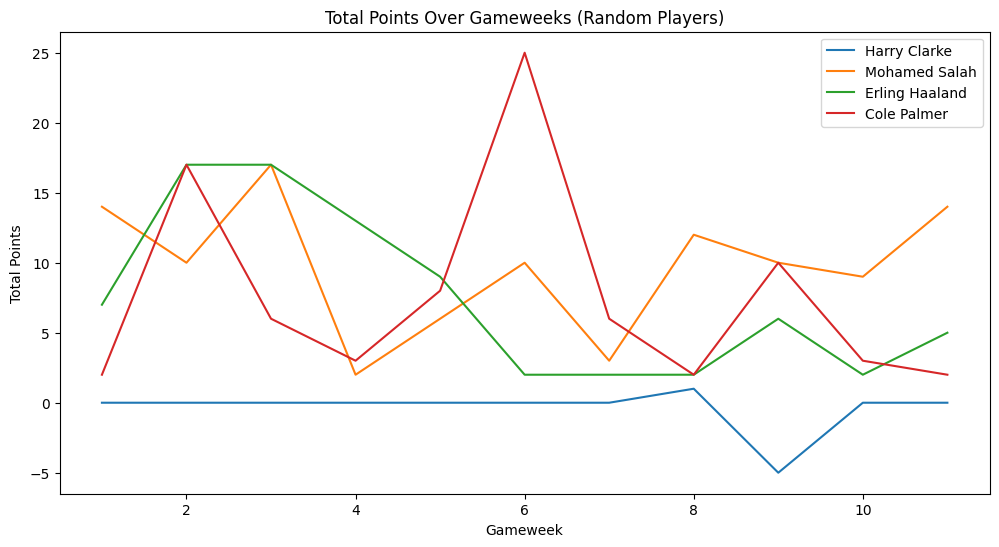

In [76]:
plt.figure(figsize=(12, 6))

top_players = aggregated_predictions['name'].value_counts().index[:4]

for player in top_players:

    player_data = current_data[current_data['name'] == player]

    plt.plot(player_data['round'], player_data['total_points'], label=player)

plt.title("Total Points Over Gameweeks (Random Players)")

plt.xlabel("Gameweek")

plt.ylabel("Total Points")

plt.legend()

plt.show()

### Heatmap of Features

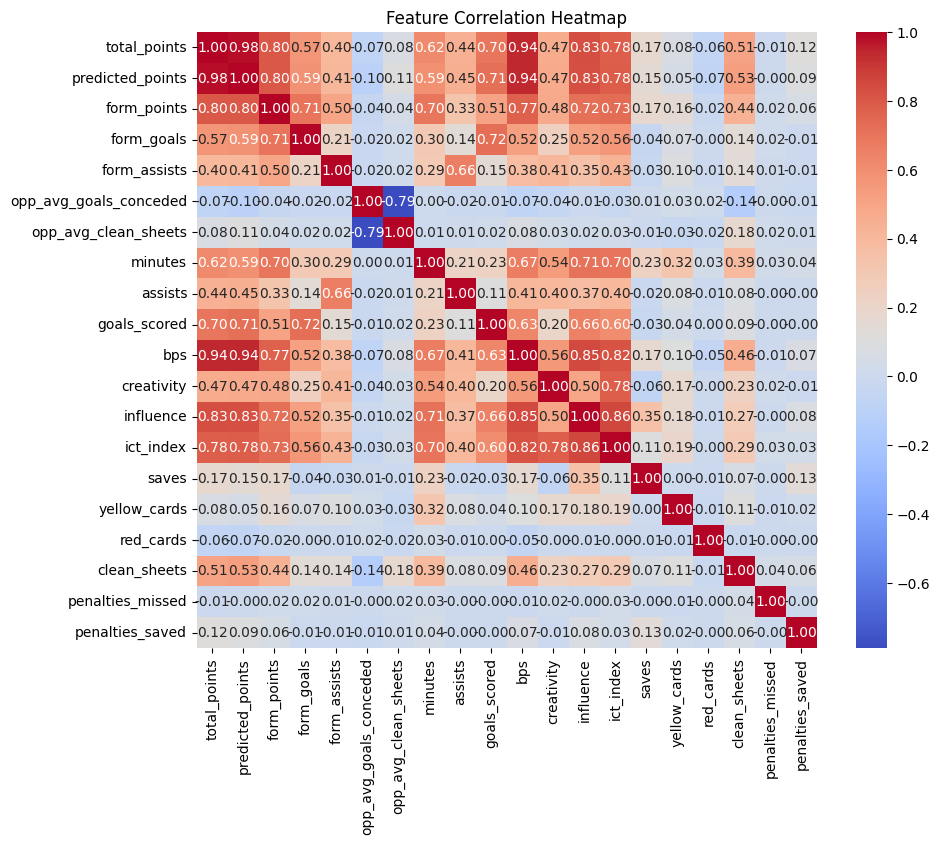

In [77]:
plt.figure(figsize=(10, 8))

correlation_matrix = current_data[['total_points', 'predicted_points', 'form_points', 'form_goals', 'form_assists', 'opp_avg_goals_conceded',
    'opp_avg_clean_sheets', 'minutes', 'assists', 'goals_scored', 'bps',
    'creativity', 'influence', 'ict_index', 'saves', 'yellow_cards',
    'red_cards', 'clean_sheets', 'penalties_missed', 'penalties_saved']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Feature Correlation Heatmap")

plt.show()

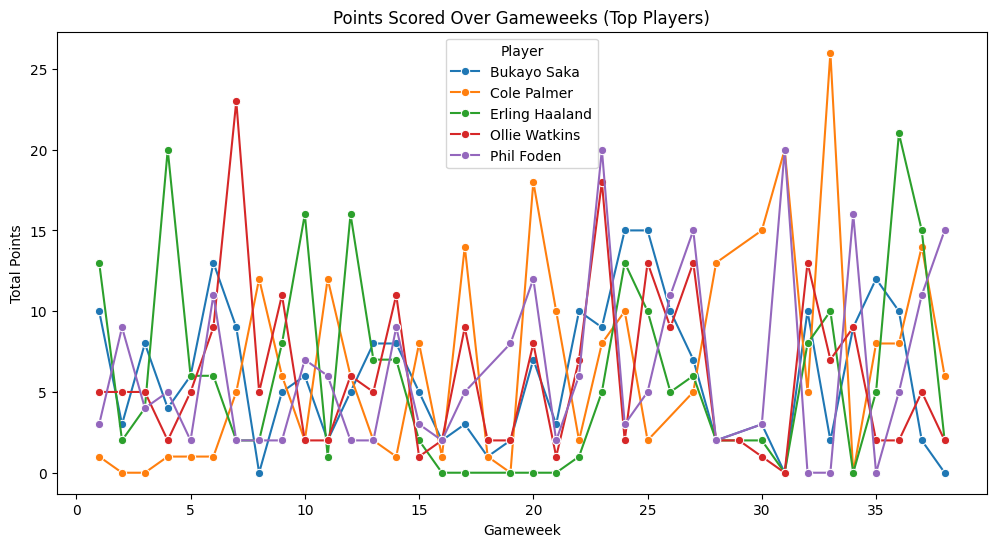

In [78]:
player_trends = historical_data.groupby(['round', 'name'])['total_points'].sum().reset_index()

top_players = player_trends.groupby('name')['total_points'].sum().nlargest(5).index
top_trends = player_trends[player_trends['name'].isin(top_players)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_trends, x='round', y='total_points', hue='name', marker='o')
plt.title("Points Scored Over Gameweeks (Top Players)")
plt.xlabel("Gameweek")
plt.ylabel("Total Points")
plt.legend(title="Player")
plt.show()


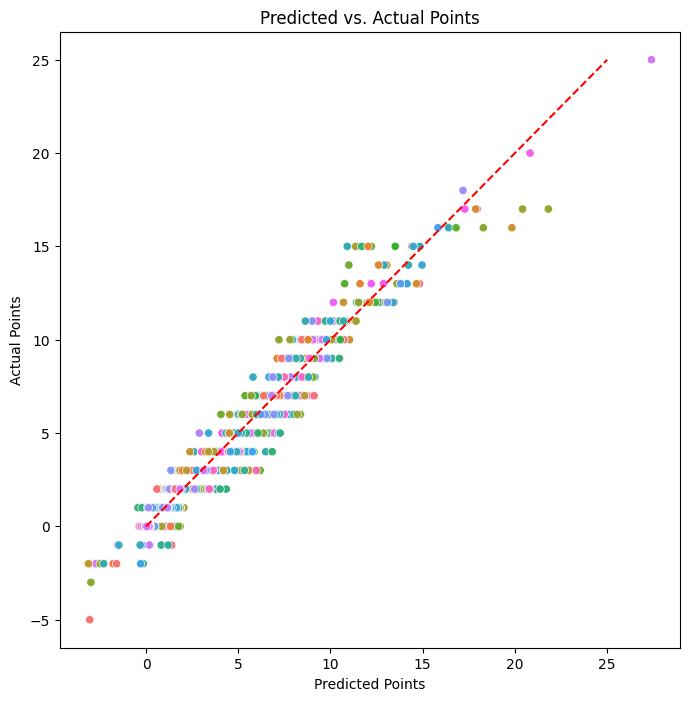

In [79]:
comparison_data = up_to_gw11.merge(current_data[['name', 'round', 'total_points']], 
                                    on=['name', 'round'], how='left')

plt.figure(figsize=(8, 8))
sns.scatterplot(data=comparison_data, x='predicted_points', y='total_points_x', hue='name', legend=False)
plt.plot([0, comparison_data['total_points_x'].max()], [0, comparison_data['total_points_x'].max()], 'r--')
plt.title("Predicted vs. Actual Points")
plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")
plt.show()

C:\Users\Radek\AppData\Local\Temp\ipykernel_19640\2300388107.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players_by_position = up_to_gw11.groupby('position_encoded').apply(


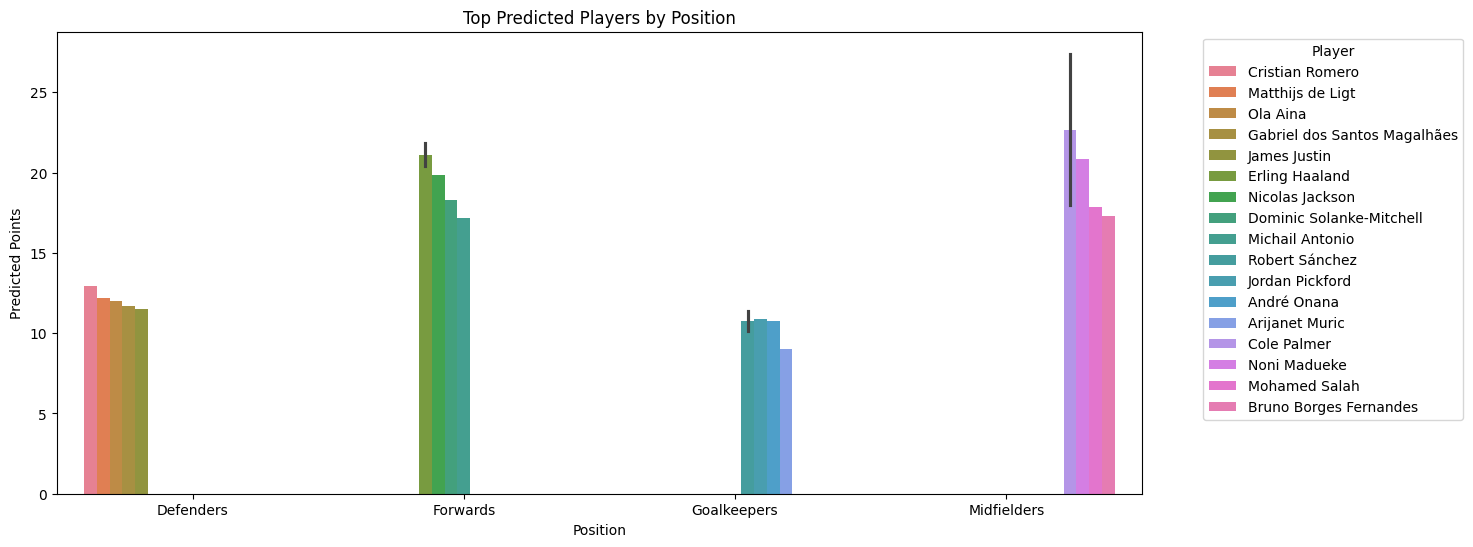

In [80]:
top_players_by_position = up_to_gw11.groupby('position_encoded').apply(
    lambda grp: grp.nlargest(5, 'predicted_points')
).reset_index(drop=True)

position_mapping = {
    0: "Defenders",
    1: "Forwards",
    2: "Goalkeepers",
    3: "Midfielders"
}

top_players_by_position['position_encoded'] = top_players_by_position['position_encoded'].replace(position_mapping)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_players_by_position, x='position_encoded', y='predicted_points', hue='name')
plt.title("Top Predicted Players by Position")
plt.xlabel("Position")
plt.ylabel("Predicted Points")
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

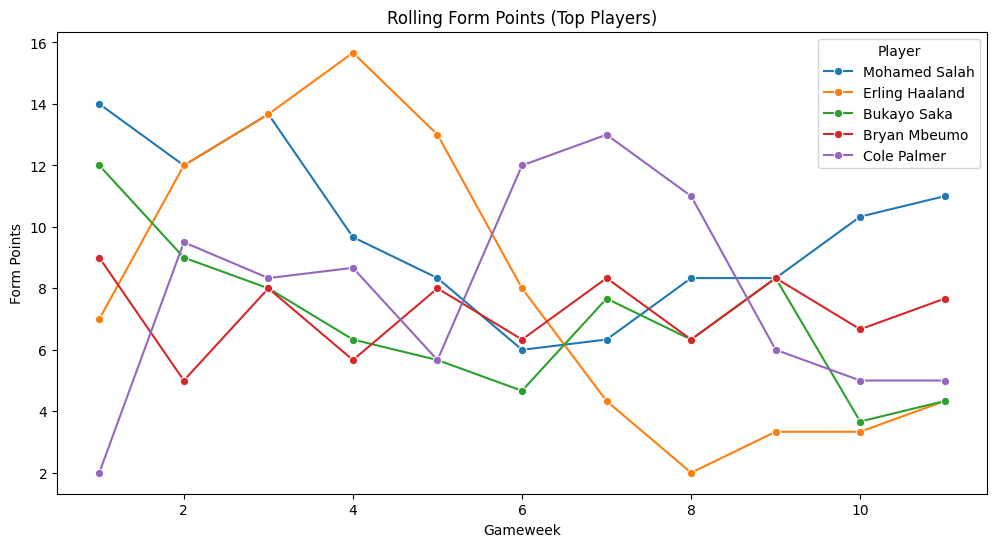

In [81]:
form_data = up_to_gw11[['round', 'name', 'form_points', 'form_goals', 'form_assists']].dropna()

top_form_players = form_data.groupby('name')['form_points'].mean().nlargest(5).index
top_form_trends = form_data[form_data['name'].isin(top_form_players)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_form_trends, x='round', y='form_points', hue='name', marker='o')
plt.title("Rolling Form Points (Top Players)")
plt.xlabel("Gameweek")
plt.ylabel("Form Points")
plt.legend(title="Player")
plt.show()

# Conclusions:
### - The model is working good
### - It has a big recency bias (for example recommending Aina so high, just because he had a high scoring gameweek 10)
### - Doesn't predict negative points at all
### - Training it on more data from previous seasons would definitely improve it
### - It's a very useful tool to help with team building for the FPL game

# Ways to improve:
### - Adding more features and making them more advanced
### - Implementing the team restrictions and budget restrictions into it (max 3 players from one team, can't get over the budget of starting 100M) so the model could predict a whole working team that would be ready to just set into the game
### - Adding more to that, making the transfers function (rolling transfers, minus points for more transfers than available)